In [1]:
import matplotlib.pyplot as plt

In [2]:
%run -i model.py

In [3]:
phi_star   = 0.98  
sigma_star = 0.16
beta_star  = 0.70

model = stochastic_volatility(phi_star, sigma_star, beta_star)

In [4]:
T = 200

x, y = model.run(T)

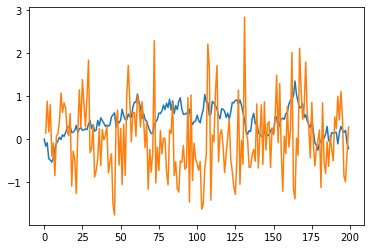

In [5]:
plt.plot(np.linspace(0, len(x)-1, len(x)), x)
plt.plot(np.linspace(1, len(x)-1, len(x)-1), y)

In [6]:
%run -i particle_filter.py

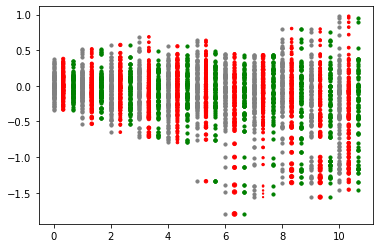

In [7]:
N = 100

proposal = kernel_proposal(phi_star, sigma_star)

PF = particle_filter(proposal, model , N)
xp, wp = PF.run_plot(y[:10])

In [8]:
%run -i particle_filter.py

4.417223658568977e-108


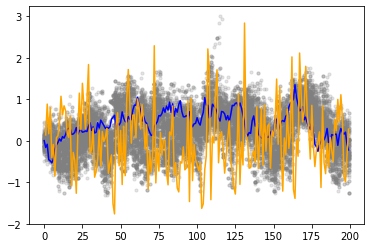

In [9]:
N = 100

proposal = kernel_proposal(phi_star, sigma_star)

PF = particle_filter(proposal, model , N)
xp, L = PF.run(y)

print(L)

time = np.linspace(0, len(x)-1, len(x))

for i in range(N):
    plt.scatter(time, xp[i,:], alpha = 0.2, color = "grey", s = 10)

plt.plot(time, x, color = "blue")
plt.plot(time[1:], y, color = "orange")

In [10]:
# time = np.linspace(0, len(x)-1, len(x))

# for i in range(N):
#     plt.plot(time[:], Wp[i,:], alpha = 0.2, color = "grey")

# plt.plot(time, (np.sum(wp, axis =0))**2/np.sum(wp**2, axis =0), color = "red")

In [11]:
%run -i SMC2.py

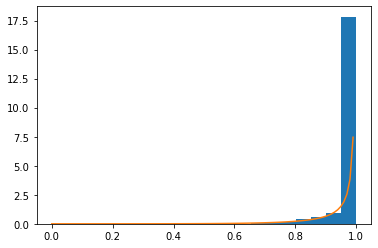

In [46]:
rv = Beta_prior(5, 5/phi_star -5)

plt.hist(rv.sample(1000), density=True)
plt.plot(np.linspace(0, 1, num=100), rv.pdf(np.linspace(0, 1, num=100)))

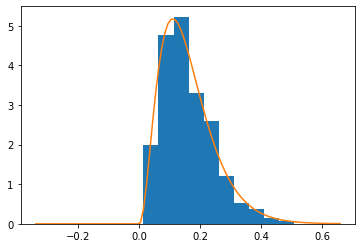

In [52]:
rv = Gamma_prior(20*sigma_star, 20)

plt.hist(rv.sample(1000), density=True)
plt.plot(np.linspace(sigma_star-0.5, sigma_star+0.5, num=100), rv.pdf(np.linspace(sigma_star-0.5, sigma_star+0.5, num=100)))

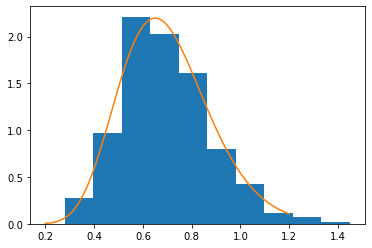

In [53]:
rv = Gamma_prior(20*beta_star, 20)

plt.hist(rv.sample(1000), density=True)
plt.plot(np.linspace(beta_star-0.5, beta_star+0.5, num=100), rv.pdf(np.linspace(beta_star-0.5, beta_star+0.5, num=100)))

In [54]:
phi_star, sigma_star, beta_star

(0.98, 0.16, 0.7)

In [62]:
%run -i SMC2.py

In [93]:
prior_phi   = Beta_prior(5, 5/phi_star -5)
prior_sigma = Gamma_prior(20*sigma_star, 20)
prior_beta  = Gamma_prior(20*beta_star, 20)

proposal_theta = theta_proposal(0.01)

N_theta = 200
N       = 300
threshold   = 0.55

SMC2 = SMC2_stochastic_volatility(prior_phi, prior_sigma, prior_beta, proposal_theta, N_theta, N, threshold)

In [94]:
phi_history, sigma_history, beta_history, L_t = SMC2.run(y)

52
125


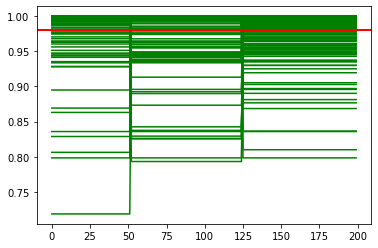

In [95]:
for i in range(N_theta):
    plt.plot(phi_history[i,:], color = "green")

plt.axhline(y = phi_star, xmin = 0, xmax = len(phi_history[i,:])-1, color = "red", lw = 2)

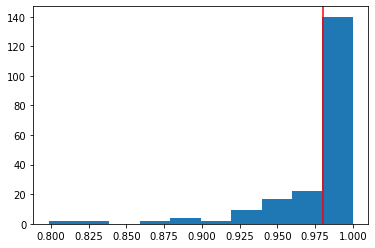

In [99]:
plt.hist(phi_history[:,-1])
plt.axvline(phi_star, color = "red")

In [105]:
np.mean(phi_history[:,-1]), phi_star

(0.9792441551457748, 0.98)

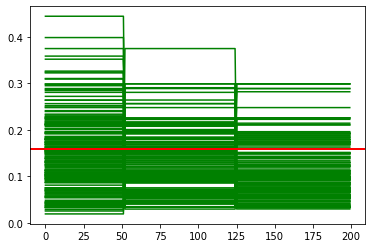

In [100]:
for i in range(N_theta):
    plt.plot(sigma_history[i,:], color = "green")

plt.axhline(y = sigma_star, xmin = 0, xmax = len(sigma_history[i,:])-1, color = "red", lw = 2)

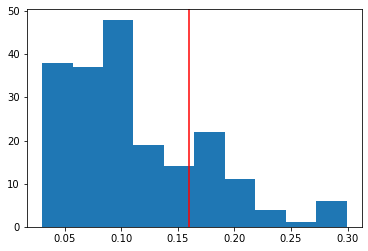

In [101]:
plt.hist(sigma_history[:,-1])
plt.axvline(sigma_star, color = "red")

In [106]:
np.mean(sigma_history[:,-1]), sigma_star

(0.11111786900987916, 0.16)

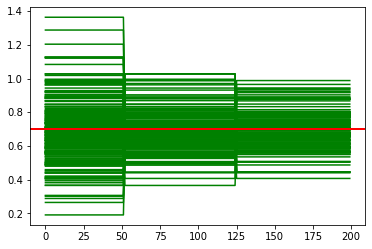

In [107]:
for i in range(N_theta):
    plt.plot(beta_history[i,:], color = "green")

plt.axhline(y = beta_star, xmin = 0, xmax = len(beta_history[i,:])-1, color = "red", lw = 2)

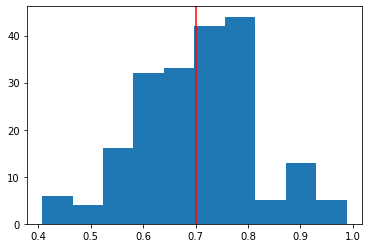

In [108]:
plt.hist(beta_history[:,-1])
plt.axvline(beta_star, color = "red")

In [109]:
np.mean(beta_history[:,-1]), beta_star

(0.7040098743286216, 0.7)

In [10]:
N = 100

proposal = bad_proposal(sigma)

PF = particle_filter(proposal, model , N)
xp, wp = PF.run(y)

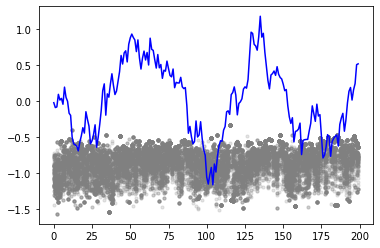

In [11]:
time = np.linspace(0, len(x)-1, len(x))

for i in range(N):
    plt.scatter(time, xp[i,:], alpha = 0.2, color = "grey", s = 10)

plt.plot(time, x, color = "blue")

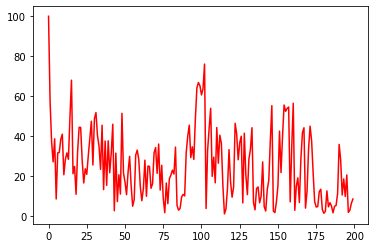

In [12]:
# time = np.linspace(0, len(x)-1, len(x))

# for i in range(N):
#     plt.plot(time[:], Wp[i,:], alpha = 0.2, color = "grey")

plt.plot(time, (np.sum(wp, axis =0))**2/np.sum(wp**2, axis =0), color = "red")

In [14]:
N = 100

proposal = bad_proposal_impoverishment(sigma)

PF = particle_filter(proposal, model , N)
xp, wp = PF.run(y)

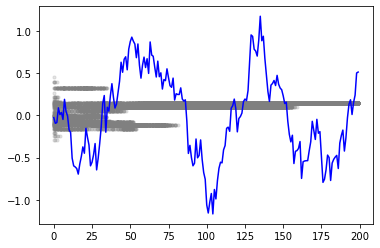

In [15]:
time = np.linspace(0, len(x)-1, len(x))

for i in range(N):
    plt.scatter(time, xp[i,:], alpha = 0.2, color = "grey", s = 10)

plt.plot(time, x, color = "blue")

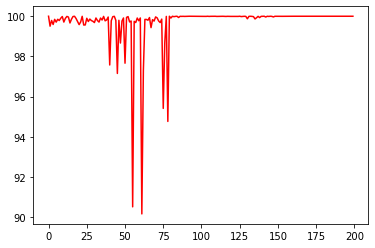

In [16]:

plt.plot(time, (np.sum(wp, axis =0))**2/np.sum(wp**2, axis =0), color = "red")